In [80]:
import sys
sys.path.append('../')
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow.compat.v1 as tf 
tf.compat.v1.disable_eager_execution()

from sklearn.preprocessing import LabelEncoder 
le  = LabelEncoder()
std = MinMaxScaler()
#std = StandardScaler()
df=pd.read_csv('../datasets/default_raw/Default_credit.csv')
df=df.drop(columns=['ID'])
df0 = df[df['default payment next month']==0].sample(n=7000)
df1 = df[df['default payment next month']==1]
df_b = pd.concat([df0,df1])
df_b.to_csv('../datasets/Default_credit_clean.csv',index=False)

In [51]:
B1 = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
'PAY_AMT5','PAY_AMT6']].values
B1.shape

(30000, 6)

In [57]:
pca = PCA(n_components=1)
principalComponents=pca.fit_transform(B1)


In [58]:
principalComponents

array([[-11443.69023554],
       [-10043.01417356],
       [ -8086.51426197],
       ...,
       [ -1689.44077268],
       [ 32965.61476645],
       [ -8635.00263698]])

In [56]:
plt.scatter(principalComponents[:,0],principalComponents[:,1], c=df['default payment next month'].values)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [21]:
data = df.to_numpy()
data

array([[ 20000,      2,      2, ...,      0,      0,      1],
       [120000,      2,      2, ...,      0,   2000,      1],
       [ 90000,      2,      2, ...,   1000,   5000,      0],
       ...,
       [ 30000,      1,      2, ...,   2000,   3100,      1],
       [ 80000,      1,      3, ...,  52964,   1804,      1],
       [ 50000,      1,      2, ...,   1000,   1000,      1]])

In [34]:
# X = data[:-1]
x=data[:,:-1]
y=data[:,-1]
print(x.shape)
print(y.shape)

(30000, 23)
(30000,)


In [36]:
pca = PCA(n_components=2)
principalComponents=pca.fit_transform(x) 

In [40]:
principalComponents.shape

(30000, 2)

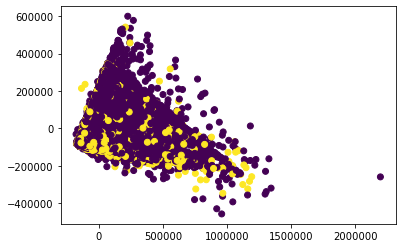

In [41]:
plt.scatter(principalComponents[:,0],principalComponents[:,1], c=df['default payment next month'].values)

In [43]:
X_embedded = TSNE(n_components=2).fit_transform(x)

In [44]:
X_embedded.shape

(30000, 2)

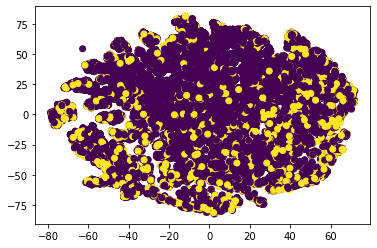

In [48]:
plt.scatter(X_embedded[:,0],X_embedded[:,1], c=df['default payment next month'].values)

In [86]:
import sys
sys.path.append('../')
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow.compat.v1 as tf 
tf.compat.v1.disable_eager_execution()

from sklearn.preprocessing import LabelEncoder 
le  = LabelEncoder()
std = MinMaxScaler()
#std = StandardScaler()

df=pd.read_csv('../datasets/default_raw/Default_credit.csv')
df=df.drop(columns=['ID'])

for column in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' ]:
    df[column]=le.fit_transform(df[column])
import numpy as np
df['AGE']=np.clip(df['AGE']/10, 1,9).astype('int')
# df['LIMIT_BAL']=(df['LIMIT_BAL']/10000).astype('int')
# df['BILL_AMT1']=(df['BILL_AMT1']/10000).astype('int')
# df['BILL_AMT2']=(df['BILL_AMT2']/10000).astype('int')
# df['BILL_AMT3']=(df['BILL_AMT3']/10000).astype('int')
# df['BILL_AMT4']=(df['BILL_AMT4']/10000).astype('int')
# df['BILL_AMT5']=(df['BILL_AMT5']/10000).astype('int')
# df['BILL_AMT6']=(df['BILL_AMT6']/10000).astype('int')
# df['PAY_AMT1']=(df['PAY_AMT1']/10000).astype('int')
# df['PAY_AMT2']=(df['PAY_AMT2']/10000).astype('int')
# df['PAY_AMT3']=(df['PAY_AMT3']/10000).astype('int')
# df['PAY_AMT4']=(df['PAY_AMT4']/10000).astype('int')
# df['PAY_AMT5']=(df['PAY_AMT5']/10000).astype('int')
# df['PAY_AMT6']=(df['PAY_AMT6']/10000).astype('int')


df[['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4',
'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
'PAY_AMT5','PAY_AMT6']]= std.fit_transform(df[['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4',
                                                  'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
                                                  'PAY_AMT5','PAY_AMT6']])
df[['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4',
'BILL_AMT5','BILL_AMT6']]=(df[['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4',
'BILL_AMT5','BILL_AMT6']]*100).astype(int)

df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]=\
(df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]*100).astype(int)

#df.to_csv('../datasets/Default_credit_clean.csv',index=False)
bound_dic={}
for col in df.columns:
    bound_dic["input_bound_{0}".format(col)] = [df[col].min(),df[col].max()]

In [87]:
df0 = df[df['default payment next month']==0].sample(n=7000)
df1 = df[df['default payment next month']==1]
df_b = pd.concat([df0,df1])
df_b
df_b.to_csv('../datasets/Default_credit_clean.csv',index=False)

In [89]:
bound_dic


{'input_bound_LIMIT_BAL': [0, 100],
 'input_bound_SEX': [0, 1],
 'input_bound_EDUCATION': [0, 6],
 'input_bound_MARRIAGE': [0, 3],
 'input_bound_AGE': [2, 7],
 'input_bound_PAY_0': [0, 10],
 'input_bound_PAY_2': [0, 10],
 'input_bound_PAY_3': [0, 10],
 'input_bound_PAY_4': [0, 10],
 'input_bound_PAY_5': [0, 9],
 'input_bound_PAY_6': [0, 9],
 'input_bound_BILL_AMT1': [0, 100],
 'input_bound_BILL_AMT2': [0, 99],
 'input_bound_BILL_AMT3': [0, 99],
 'input_bound_BILL_AMT4': [0, 100],
 'input_bound_BILL_AMT5': [0, 100],
 'input_bound_BILL_AMT6': [0, 100],
 'input_bound_PAY_AMT1': [0, 100],
 'input_bound_PAY_AMT2': [0, 100],
 'input_bound_PAY_AMT3': [0, 100],
 'input_bound_PAY_AMT4': [0, 100],
 'input_bound_PAY_AMT5': [0, 100],
 'input_bound_PAY_AMT6': [0, 100],
 'input_bound_default payment next month': [0, 1]}

In [17]:
df.to_csv('../datasets/Default_credit_clean_test.csv',index=False)
